In [1]:
import numpy
import pandas

from matplotlib import pyplot
%matplotlib inline
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow
import keras
from tensorflow.keras import layers, models, metrics, callbacks

RANDOM_STATE = 20

In [2]:
ROOT = '/kaggle/input/petfinder-pawpularity-score/'

def read_csv(file):
    return pandas.read_csv(ROOT + file + '.csv', sep=',')

In [3]:
df = read_csv('train')

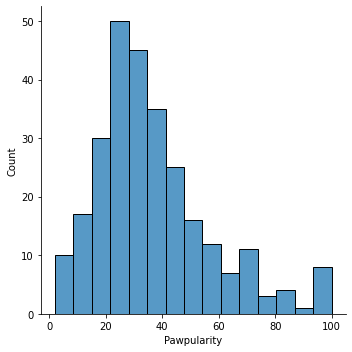

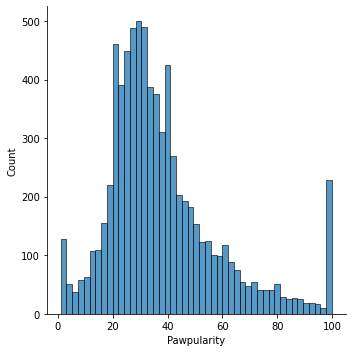

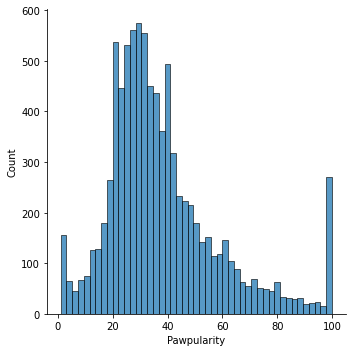

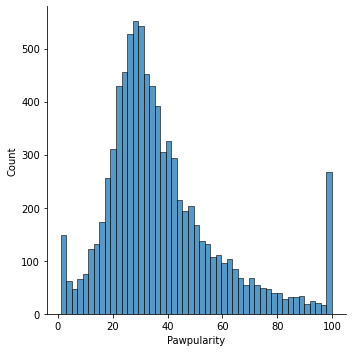

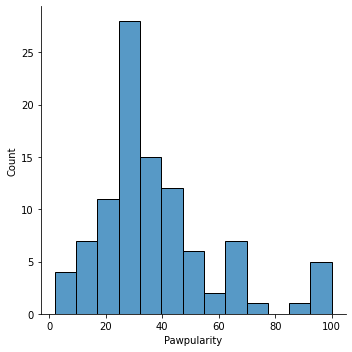

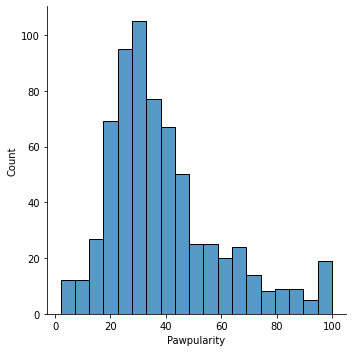

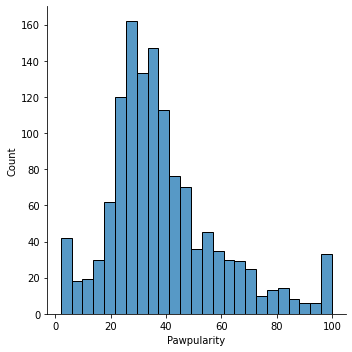

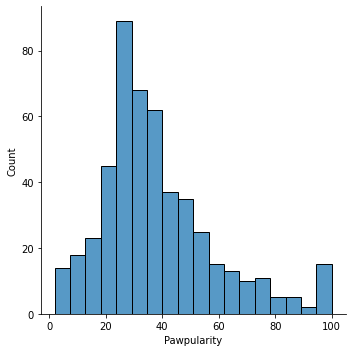

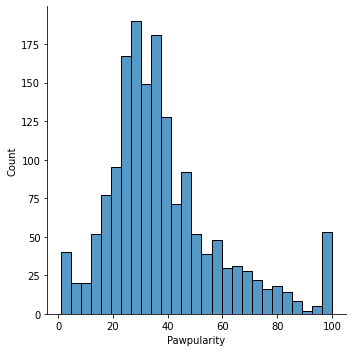

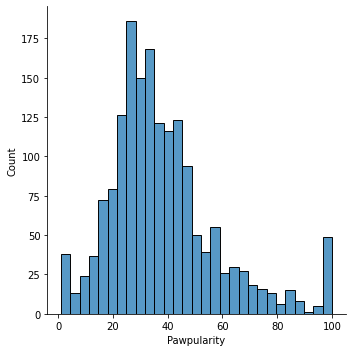

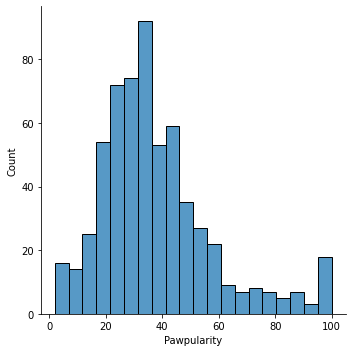

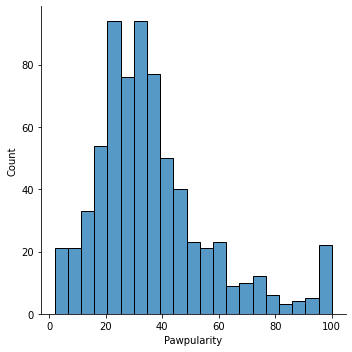

In [4]:
signs = [
    'Subject Focus',
    'Eyes',
    'Face',
    'Near',
    'Action',
    'Accessory',
    'Group',
    'Collage',
    'Human',
    'Occlusion',
    'Info',
    'Blur',
]
for s in signs:
    seaborn.displot(df.loc[df[s] == 1]['Pawpularity'])
    
#seaborn.displot(numpy.log(df['Pawpularity']))
#seaborn.displot(numpy.log(df['Pawpularity']) / numpy.log(100))

#display(df['Pawpularity'].describe())

In [5]:
def signNeurons():
    model = models.Sequential()
    model.add(layers.Dense(32, input_shape=(12,)))
    model.add(layers.Activation('sigmoid'))  
    model.add(layers.Dense(32))
    model.add(layers.Activation('sigmoid'))  
    
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))
    
    model.compile(optimizer='adam', loss='mse', metrics=[metrics.RootMeanSquaredError(name='rmse')])
    return model

cf = df.copy()
cf = cf.drop('Id', axis=1)
y = numpy.log(cf['Pawpularity']) / numpy.log(100)
cf = cf.drop('Pawpularity', axis=1)

train_cf, test_cf, train_y, test_y = train_test_split(cf, y, test_size=0.2, random_state=RANDOM_STATE)

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=10)
signNeurons = signNeurons()
history = signNeurons.fit(train_cf, train_y, validation_data=(test_cf, test_y), epochs=200, batch_size=256, callbacks=[stopper])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/200
31/31 [==============================] - 1s 9ms/step - loss: 0.0204 - rmse: 0.1427 - val_loss: 0.0177 - val_rmse: 0.1331
Epoch 2/200
31/31 [==============================] - 0s 3ms/step - loss: 0.0200 - rmse: 0.1415 - val_loss: 0.0176 - val_rmse: 0.1328
Epoch 3/200
31/31 [==============================] - 0s 3ms/step - loss: 0.0199 - rmse: 0.1411 - val_loss: 0.0177 - val_rmse: 0.1330
Epoch 4/200
31/31 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1405 - val_loss: 0.0176 - val_rmse: 0.1328
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1395 - val_loss: 0.0176 - val_rmse: 0.1328
Epoch 6/200
31/31 [==============================] - 0s 3ms/step - loss: 0.0195 - rmse: 0.1397 - val_loss: 0.0177 - val_rmse: 0.1331
Epoch 7/200
31/31 [==============================] - 0s 3ms/step - loss: 0.0195 - rmse: 0.1395 - val_loss: 0.0176 - val_rmse: 0.1328
Epoch 8/200
31/31 [==============================] - 0s 3ms/step - lo

In [6]:
def imageNeurons():
    model = models.Sequential()
    n = 32
    i = 128
    
    model.add(layers.Conv2D(n, (3, 3), input_shape=(i, i, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Flatten())
    model.add(layers.Dense(n))
    model.add(layers.Activation('relu'))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))
    
    model.compile(optimizer='adam', loss='mse', metrics=[metrics.RootMeanSquaredError(name='rmse')])
    return model

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=40)

In [7]:
imgs = []
y = []
for _, r in df.iterrows():
    imgs.append(tensorflow.image.resize(tensorflow.io.decode_jpeg(tensorflow.io.read_file(ROOT + 'train/' + r['Id'] + '.jpg'), channels=3), [128, 128]))
    y.append(numpy.log(r['Pawpularity']) / numpy.log(100))

imgs = numpy.array(imgs)
y = numpy.array(y)

In [8]:
imageNeurons = imageNeurons()

train_images, test_images, train_y, test_y = train_test_split(imgs, y, test_size=0.2, random_state=RANDOM_STATE)

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=5)
history = imageNeurons.fit(train_images, train_y, validation_data=(test_images, test_y), epochs=20, batch_size=256, callbacks=[stopper])

Epoch 1/20
31/31 [==============================] - 230s 7s/step - loss: 0.0762 - rmse: 0.2760 - val_loss: 0.1544 - val_rmse: 0.3930
Epoch 2/20
31/31 [==============================] - 229s 7s/step - loss: 0.0261 - rmse: 0.1616 - val_loss: 0.0188 - val_rmse: 0.1371
Epoch 3/20
31/31 [==============================] - 228s 7s/step - loss: 0.0224 - rmse: 0.1497 - val_loss: 0.0223 - val_rmse: 0.1492
Epoch 4/20
31/31 [==============================] - 229s 7s/step - loss: 0.0223 - rmse: 0.1494 - val_loss: 0.0191 - val_rmse: 0.1382
Epoch 5/20
31/31 [==============================] - 227s 7s/step - loss: 0.0221 - rmse: 0.1486 - val_loss: 0.0216 - val_rmse: 0.1468
Epoch 6/20
31/31 [==============================] - 230s 7s/step - loss: 0.0221 - rmse: 0.1486 - val_loss: 0.0219 - val_rmse: 0.1481
Epoch 7/20
31/31 [==============================] - 229s 7s/step - loss: 0.0217 - rmse: 0.1474 - val_loss: 0.0212 - val_rmse: 0.1456


In [9]:
del imgs

In [10]:
test = read_csv('test')

test_imgs = []
for _, r in test.iterrows():
    test_imgs.append(tensorflow.image.resize(tensorflow.io.decode_jpeg(tensorflow.io.read_file(ROOT + 'test/' + r['Id'] + '.jpg'), channels=3), [128, 128]))

test_imgs = numpy.array(test_imgs)

res = pandas.DataFrame()
res['Id'] = test['Id']
test = test.drop('Id', axis=1)
res['Pawpularity'] = (numpy.exp(imageNeurons.predict(test_imgs) * numpy.log(100)) + numpy.exp(signNeurons.predict(test) * numpy.log(100))) / 2

display(res.head(10))
res.to_csv('submission.csv', index=False)

Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    35.126625
1  43a2262d7738e3d420d453815151079e    35.809380
2  4e429cead1848a298432a0acad014c9d    35.149136
3  80bc3ccafcc51b66303c2c263aa38486    34.874046
4  8f49844c382931444e68dffbe20228f4    34.901642
5  b03f7041962238a7c9d6537e22f9b017    35.393826
6  c978013571258ed6d4637f6e8cc9d6a3    34.136631
7  e0de453c1bffc20c22b072b34b54e50f    34.421318